<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, r2_score, precision_score, recall_score, precision_recall_curve, roc_curve
from sklearn.utils import shuffle

In [2]:
# фильтр предупреждений
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# загрузим файл с данными
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('/Users/alex/Desktop/Яндекс_Практикум/Проекты/Обучение_с_учителем/Churn.csv')

df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5981,5982,15801296,Farber,634,Germany,Female,37,7.0,143258.85,2,1,0,192721.98,0
2042,2043,15635459,Shih,667,Germany,Female,27,3.0,106116.50,2,1,0,3674.71,0
9739,9740,15797293,Sopuluchukwu,677,France,Female,25,3.0,0.00,2,1,0,179608.96,0
9195,9196,15710315,Chukwukadibia,529,Germany,Male,29,4.0,135759.40,1,0,0,112813.79,1
8485,8486,15724269,Yao,670,France,Male,25,7.0,0.00,2,1,1,144723.38,0


Данные представляют из себя следующие признаки:
*  количественные:
** `CreditScore` — кредитный рейтинг
** `Age` — возраст
** `Tenure` — сколько лет человек является клиентом банка
** `Balance` — баланс на счёте
** `NumOfProducts` — количество продуктов банка, используемых клиентом
** `EstimatedSalary` — предполагаемая зарплата   


* категориальные:
** `RowNumber` — индекс строки в данных
** `CustomerId` — уникальный идентификатор клиента
** `Surname` — фамилия
** `Geography` — страна проживания
** `Gender` — пол
** `HasCrCard` — наличие кредитной карты
** `IsActiveMember` — активность клиента
** `Exited` — факт ухода клиента (**целевой**)

Удалим признаки `RowNumber`, `CustomerId` и `Surname`, т.к. они не несут в себе необходимой информации для дальнейшей обработки данных.

In [4]:
# удалим признаки RowNumber, CustomerId и Surname
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4338,714,Spain,Male,25,2.0,0.0,1,1,1,132979.43,0


In [5]:
# описательные статистики
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Количественные признаки имеют достаточно большой разброс и масштаб.

In [6]:
# проверим дубликаты
print(f"Количество дубликатов: {df.duplicated().sum()}")

Количество дубликатов: 0


In [7]:
# процент и количество пропущенных значений в столбце Tenure
print(f"Количество пропусков Tenure:  {df['Tenure'].isnull().sum()}")
print(f"Процент пропусков Tenure: {np.mean(df['Tenure'].isnull()):.2%}")

Количество пропусков Tenure:  909
Процент пропусков Tenure: 9.09%


Пропуски могут повлиять на качество модели. Можно заполнить пропуски средним значением, медианой или модой, но это может привести к переобучению, поэтому заполним пропуски и сделаем признак категориальным.

In [8]:
# заполним пропуски на -1, тип данных - object
df['Tenure'] = df['Tenure'].fillna(-1)
df['Tenure'] = df['Tenure'].astype('object')
df.info()
df.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  object 
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2748,401,Germany,Male,48,8.0,128140.17,1,1,0,175753.55,1


Преобразуем категориальные признаки в числовые методом прямого кодирования (One-Hot Encoding), для избежания дамми-ловушки, используем аргумент `drop_first`.

In [9]:
# One-Hot Encoding
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.sample(3)

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,...,Tenure_1.0,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0
8655,611,30,0.00,2,1,1,148887.69,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5611,625,42,100047.33,1,1,0,93429.95,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3125,736,26,135889.13,1,1,1,165692.03,0,0,1,...,0,0,0,1,0,0,0,0,0,0


Разобьем данные на 3 выборки: обучающую, валидационную и тестовую, в соотношении 3:1:1.

In [10]:
# псевдослучайность: random_state=42, стратификация по целевой переменной (параметр stratify)
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)

features_train, features_rest, target_train, target_rest = train_test_split(
    features, target, test_size=.4, random_state=42, stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_rest, target_rest, test_size=.5, random_state=42, stratify=target_rest)
print(f'Обучающая: {features_train.shape[0] / len(df):.0%}')
print(f'Валидационная: {features_valid.shape[0] / len(df):.0%}')
print(f'Тестовая: {features_test.shape[0] / len(df):.0%}')

Обучающая: 60%
Валидационная: 20%
Тестовая: 20%


Масшатбируем количественные признаки.

In [11]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
# метод StandardScaler
numeric = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
display(features_train.sample())
display(features_valid.sample())
features_test.sample()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,...,Tenure_1.0,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0
8866,-1.294266,-0.46996,0.746474,-0.919109,0.640913,0.967527,-0.919463,1,0,1,...,0,0,1,0,0,0,0,0,0,0


,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,...,Tenure_1.0,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0
4030,-0.49581,0.295681,-1.220584,-0.919109,0.640913,0.967527,-0.158534,0,1,0,...,0,0,0,0,0,1,0,0,0,0


,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,...,Tenure_1.0,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0
3217,-0.547658,1.635551,0.356013,-0.919109,0.640913,0.967527,-0.963396,0,1,0,...,0,0,0,1,0,0,0,0,0,0


**Вывод**  

Данные загружены и проверены:
* Дубликатов нет
* Удалены признаки `RowNumber`, `CustomerId` и `Surname`
* Пропуски в `Tenure` заполнены, сам признак стал категориальным
* Категориальные признаки преобразованы в количественные
* Данные разделены на: обучающую, валидационную и тестовую в соотношении 3:1:1
* Признаки масшабированы.

## Исследование задачи

In [13]:
# посмотрим на дисбаланс целевого признака
print(f"Класс 0: {df['Exited'].value_counts()[0] / len(df):.2%}")
print(f"Класс 1: {df['Exited'].value_counts()[1] / len(df):.2%}")

Класс 0: 79.63%
Класс 1: 20.37%


Обучим различные модели без учёта дисбаланса классов.

In [14]:
# создадим функцию для обучения различных моделей
# на выходе получим название модели, её точность, F1-меру, AUC-ROC
def modeling (features_modeling, target_modeling, weight_metric):
    
    models = [LogisticRegression(random_state=42, solver='liblinear', class_weight=weight_metric),
              DecisionTreeClassifier(random_state=42, max_depth=8, class_weight=weight_metric),
              RandomForestClassifier(random_state=42, n_estimators=500, max_depth=24, class_weight=weight_metric)]
    results = []

    for model in models:
        model.fit(features_modeling, target_modeling)
        predictions_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
    
        accuracy = accuracy_score(target_valid, predictions_valid)
        f1 = f1_score(target_valid, predictions_valid)
        roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])
    
        results.append({'Модель': model.__class__.__name__, 
                               'Точность': accuracy, 
                               'F1-мера': f1, 
                               'AUC-ROC': roc_auc})
    return pd.DataFrame(results)
modeling(features_train, target_train, None)

,Модель,Точность,F1-мера,AUC-ROC
0,LogisticRegression,0.811,0.312727,0.789165
1,DecisionTreeClassifier,0.858,0.588406,0.827682
2,RandomForestClassifier,0.873,0.617470,0.870508


In [15]:
# порог вероятности классов
models = [LogisticRegression(random_state=42, solver='liblinear'),
              DecisionTreeClassifier(random_state=42, max_depth=8),
              RandomForestClassifier(random_state=42, n_estimators=500, max_depth=24)]
results = []
for model in models:
    model.fit(features_train, target_train)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    for threshold in np.arange(0, 1.0, 0.01):
        predicted_valid = probabilities_one_valid > threshold
        precision = precision_score(target_valid, predicted_valid)
        recall = recall_score(target_valid, predicted_valid)
        f1 = f1_score(target_valid, predicted_valid)
        print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1-мера = {:.3f}".format(
            threshold, precision, recall, f1))

Порог = 0.00 | Точность = 0.204, Полнота = 1.000, F1-мера = 0.339
Порог = 0.01 | Точность = 0.204, Полнота = 1.000, F1-мера = 0.339
Порог = 0.02 | Точность = 0.205, Полнота = 1.000, F1-мера = 0.340
Порог = 0.03 | Точность = 0.208, Полнота = 1.000, F1-мера = 0.345
Порог = 0.04 | Точность = 0.215, Полнота = 1.000, F1-мера = 0.353
Порог = 0.05 | Точность = 0.221, Полнота = 0.995, F1-мера = 0.362
Порог = 0.06 | Точность = 0.231, Полнота = 0.980, F1-мера = 0.374
Порог = 0.07 | Точность = 0.239, Полнота = 0.971, F1-мера = 0.383
Порог = 0.08 | Точность = 0.246, Полнота = 0.956, F1-мера = 0.391
Порог = 0.09 | Точность = 0.255, Полнота = 0.939, F1-мера = 0.401
Порог = 0.10 | Точность = 0.265, Полнота = 0.926, F1-мера = 0.412
Порог = 0.11 | Точность = 0.277, Полнота = 0.917, F1-мера = 0.425
Порог = 0.12 | Точность = 0.290, Полнота = 0.902, F1-мера = 0.438
Порог = 0.13 | Точность = 0.301, Полнота = 0.882, F1-мера = 0.448
Порог = 0.14 | Точность = 0.310, Полнота = 0.868, F1-мера = 0.457
Порог = 0.

## Борьба с дисбалансом

Для борьбы с дисбалансом классов попробуем:
* взвешивание классов (`class_weight='balanced'`)
* увеличение выборки положительного класса (`upsampling`)
* уменьшение выборки отрицательного класса (`downsampling`)

In [16]:
# взвешивание классов: class_weight='balanced'
modeling(features_train, target_train, 'balanced')

,Модель,Точность,F1-мера,AUC-ROC
0,LogisticRegression,0.7165,0.516624,0.791430
1,DecisionTreeClassifier,0.7620,0.564899,0.809362
2,RandomForestClassifier,0.8680,0.602410,0.870138


F1-мера увеличилась у логистической регрессии и уменьшилась у решающего дерева и случайного леса.

In [17]:
# увеличение выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=42)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

modeling(features_upsampled, target_upsampled, None)

,Модель,Точность,F1-мера,AUC-ROC
0,LogisticRegression,0.7635,0.528415,0.791095
1,DecisionTreeClassifier,0.7975,0.574132,0.822454
2,RandomForestClassifier,0.8610,0.626344,0.867567


F1-мера у всех моделей выросла.

In [18]:
# уменьшение выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=42)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.44)

modeling(features_downsampled, target_downsampled, None)

,Модель,Точность,F1-мера,AUC-ROC
0,LogisticRegression,0.7960,0.531034,0.789873
1,DecisionTreeClassifier,0.8115,0.591549,0.818056
2,RandomForestClassifier,0.8475,0.644936,0.867313


 F1-мера у всех моделей выросла.

**Вывод**  

Наилучший результат по ключевой метрике F1-меры получился у модели случайного леса на уменьшенной выборке и составил: `0.64`, что удовлетворяет необходимому условию.

## Тестирование модели

In [19]:
# проверим модели на тестовой выборке
models = [LogisticRegression(random_state=42, solver='liblinear'),
              DecisionTreeClassifier(random_state=42, max_depth=8),
              RandomForestClassifier(random_state=42, n_estimators=500, max_depth=24)]
results = []
for model in models:
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_test)
    probabilities_valid = model.predict_proba(features_test)
    
    accuracy = accuracy_score(target_test, predictions_valid)
    f1 = f1_score(target_test, predictions_valid)
    roc_auc = roc_auc_score(target_test, probabilities_valid[:,1])
    
    results.append({'Модель': model.__class__.__name__, 
                               'Точность': accuracy, 
                               'F1-мера': f1, 
                               'AUC-ROC': roc_auc})
pd.DataFrame(results)

,Модель,Точность,F1-мера,AUC-ROC
0,LogisticRegression,0.790,0.508197,0.771505
1,DecisionTreeClassifier,0.809,0.573661,0.806681
2,RandomForestClassifier,0.840,0.616307,0.850298


На тестовой выборке, у модели случайного леса, F1-мера составила `0.61`, AUC-ROC: `0.85`, точность: `0.84`.

0.7963


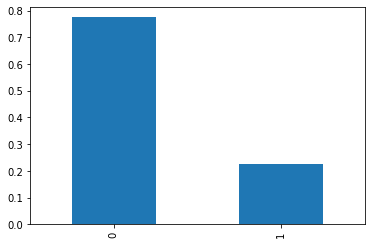

In [20]:
# проверим модель на адекватность
model = RandomForestClassifier(random_state=42, n_estimators=500, max_depth=24)
model.fit(features_downsampled, target_downsampled)
predicted_valid_adequacy = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid_adequacy.value_counts(normalize=True)
class_frequency.plot(kind='bar')
target_pred_constant = pd.Series([0]*len(target))
print(accuracy_score(target, target_pred_constant))

Модель адекватна.

Проверка модели на тестовой выборке показала, что модель работает: показатель метрики F1-меры удалось достигнуть необходимого значения.
Итоговая модель: случайный лес (`RandomForestClassifier`), с гиперпараметрами `n_estimators=500`, `max_depth=24`, построенная на увеличенной выборке.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*